In [1]:
import os
from PIL import Image

In [2]:
def get_train_file_path(foldername):
    return f"train/{foldername}"

In [3]:
def validate_file(folder_path):
    image_count=0;
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            image_count=image_count+1
    print(f"{folder_path}")        
    print(f"{image_count}")     

In [10]:
validate_file(get_train_file_path("angry"))
validate_file(get_train_file_path("bored"))
validate_file(get_train_file_path("focused"))
validate_file(get_train_file_path("neutral"))

train/angry
552
train/bored
511
train/focused
378
train/neutral
500


In [11]:
def check_imagesize(folder_path):
    valid=True
    print(f"{folder_path}")
    for filename in os.listdir(folder_path):
        file_path=os.path.join(folder_path,filename)
        if os.path.isfile(file_path):
            size_in_byte=os.path.getsize(file_path)
            if size_in_byte>2500:
                print("Invalid size")
                valid=False
                break        
    return valid

In [13]:
check_imagesize(get_train_file_path("angry"))
check_imagesize(get_train_file_path("bored"))
check_imagesize(get_train_file_path("focused"))
check_imagesize(get_train_file_path("neutral"))

train/angry
train/bored
train/focused
Invalid size
train/neutral


True

In [14]:
def get_test_file_path(folder_path):
    return f"test/{folder_path}"

In [15]:
validate_file(get_test_file_path("angry"))
validate_file(get_test_file_path("bored"))
validate_file(get_test_file_path("focused"))
validate_file(get_test_file_path("neutral"))

test/angry
260
test/bored
138
test/focused
381
test/neutral
300


In [16]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_sample_images_and_pixel_intensity(folder_path, num_samples=5):
    # Get a list of image file paths in the folder
    image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.lower().endswith(('.jpg'))]
    
    # Randomly sample 'num_samples' images from the folder
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))
    
    # Plot the images and their pixel intensity distributions
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    
    for i, image_path in enumerate(sample_images):
        # Display the image
        img = Image.open(image_path)
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Sample Image {i + 1}")
        axes[i, 0].axis('off')
        
        # Display the pixel intensity histogram
        pixel_values = np.array(img.convert('L')).ravel()  # Convert to grayscale and flatten using NumPy
        axes[i, 1].hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
        axes[i, 1].set_title("Pixel Intensity Histogram")
    
    plt.tight_layout()
    plt.show()


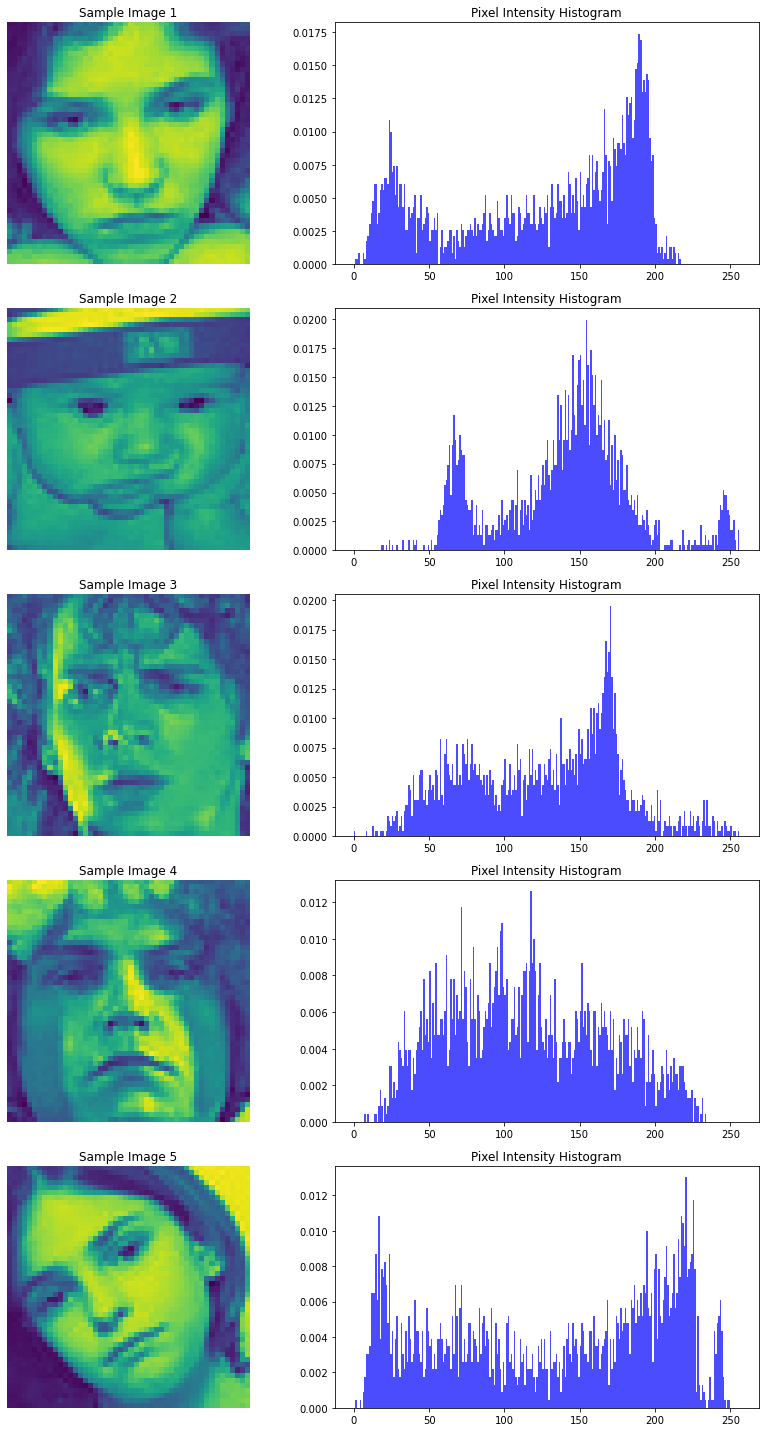

In [21]:
visualize_sample_images_and_pixel_intensity("train/bored")

In [18]:
import os
import matplotlib.pyplot as plt

def visualize_class_distribution(data_folder):
    # Get a list of subdirectories (class categories) in the data folder
    class_labels = [label for label in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, label))]
    
    # Count the number of data points in each class
    class_counts = [len(os.listdir(os.path.join(data_folder, label)) ) for label in class_labels]
    
    # Create a bar chart to visualize the class distribution
    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, class_counts, color=['blue', 'red','black','green','yellow'])  # You can customize colors
    plt.xlabel("Classes")
    plt.ylabel("Number of Data Points")
    plt.title("Class Distribution")
    plt.show()


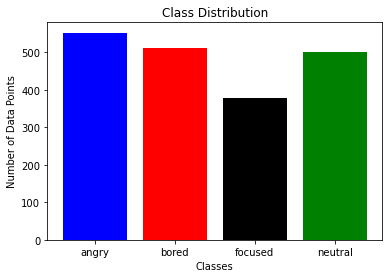

In [19]:
visualize_class_distribution("train")

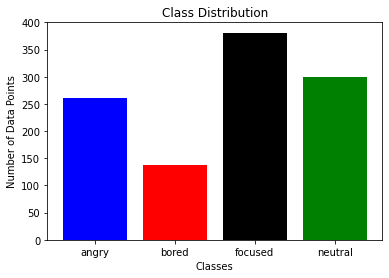

In [20]:
visualize_class_distribution("test")